# Projeto de Processamento Digital de Imagens - Esteganografia

## 1. Equipe
- Joel Oliveira Ribeiro
- Matheus Mendes
- Vanessa Rodrigues
- Sérgio Luis

## 2. Introdução  
### 2.1. Breve explicação

A esteganografia digital consiste em ocultar informações (arquivos, imagens, audios e etc) em outros arquivos. No nosso caso, iremos ocultar as informações em outras imagens.

fonte : https://www.vivaolinux.com.br/artigo/Esteganografia-e-Esteganalise-transmissao-e-deteccao-de-informacoes-ocultas-em-imagens-digitais

### 2.2 Por que utilizamos Python ?

Optamos por utilizar a linguagem Python em nosso trabalho por possuir poderosas bibliotecas de manipulações gráficas como a PIL (Python Image Library) e o OpenCV nas quais ajudarão no processamento de imagens , além de muitas outras tais como Numpy, Matplotlib e etc ... 

In [78]:
# Importando algumas das bibliotecas que serão úteis para apresentação desse trabalho 

% matplotlib inline

import numpy as np
import pylab as plb
import cv2
from matplotlib import pyplot as plt 
import hashlib

## 3. Procedimento e Discussão Técnica
### 3.1 Imagem a ser utilizada 

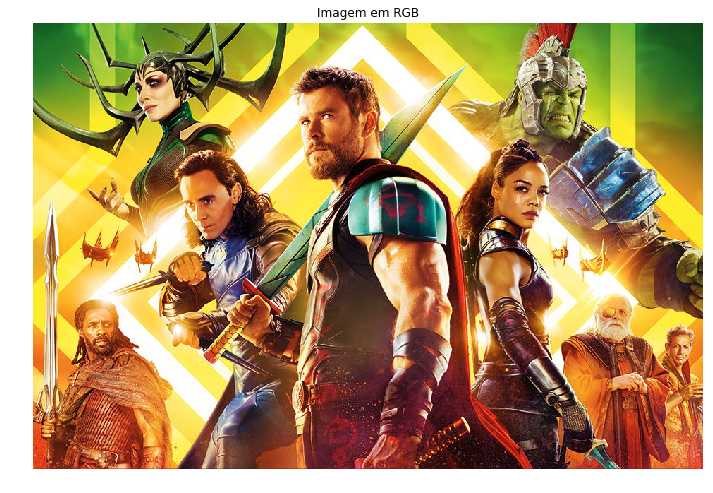

In [2]:
# Carregando a imagem escolhida para que seja utilizada para ocultar informações
imgRGB = cv2.imread('thor_ragnarok.jpg')
imgRGB = cv2.cvtColor(imgRGB, cv2.COLOR_BGR2RGB)

# mostrando a imagem
plb.figure(figsize=(12,12))
plb.title('Imagem em RGB')
plb.imshow(imgRGB) ; plb.axis('off') ; #plb.colorbar()

#### Algumas informações que podemos extrair da imagem

In [3]:
#1. Tamanho da imagem
print(imgRGB.shape) # dimensão

#2. Tipo da imagem
print(imgRGB.dtype) # tipo

(633, 950, 3)
uint8


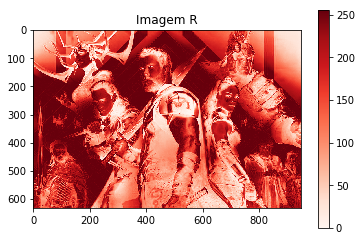

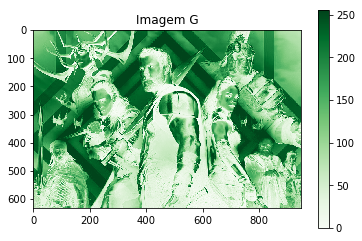

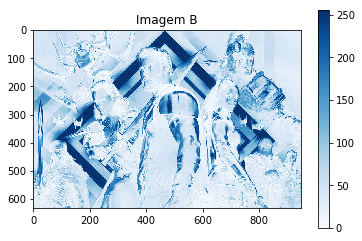

In [4]:
#3. Mostrando as matrizes R , G , B separadamente 

plb.figure(); plb.imshow(imgRGB[:,:,0],cmap='Reds');   plb.colorbar();   plb.title('Imagem R')  

plb.figure(); plb.imshow(imgRGB[:,:,1],cmap='Greens'); plb.colorbar();   plb.title('Imagem G') 

plb.figure(); plb.imshow(imgRGB[:,:,2],cmap='Blues');  plb.colorbar();    plb.title('Imagem B') 

### 3.2 Mascaras Binarias
Usaremos 2 tipos de mascaras que são AND (&) e OR (|) 
Usaremos a mascara do tipo AND para mudarmos os bits que quisermos para o valor 0
Usaremos a mascara do tipo OU para mudarmos os bits que quisermos para o valor 1

Exemplos abaixo

In [68]:
#Formato de um Pixel
print ('Valor Inteiro')
print(42)

#Representação dos valores RGB EM BINARIO
print('Representação binaria')
print ("{0:b}".format(42))


#Mudar o valor de todos os bits para 1 , usaremos a mascara 21 que tem seu binário 010101
print('Nova Representação binaria')
value = 42 | 21
print ("{0:b}".format(value))

#Mudar o valor de todos os bits para 0 , usaremos a mascara 21 que tem seu binário 010101
print('Nova Representação binaria')
value = 42 & 0
print ("{0:b}".format(value))




Valor Inteiro
42
Representação binaria
101010
Nova Representação binaria
111111
Nova Representação binaria
0


### 3.3 Método da substituição do Bit Menos Significativo (LSB)

O processo de esteganografia digital em uma imagem consiste na modificação de alguns bits que compõem cada pixel, para que passem a armazenar alguns bits do dado/arquivo que será embutido. Podemos utilizar o bit menos significativo (LSB) , pois quando modificado produz alterações mínimas nas cores da imagem. 

(633, 950, 3)
Valores de cada pixel antes da modificação do bit menos significativo
[17 88 30]
Representação binaria dos valores
['10001', '1011000', '11110']
Modificando os bits menos significativos para 1
[17 89 31]
Representação binaria dos valores modificados
['10001', '1011001', '11111']


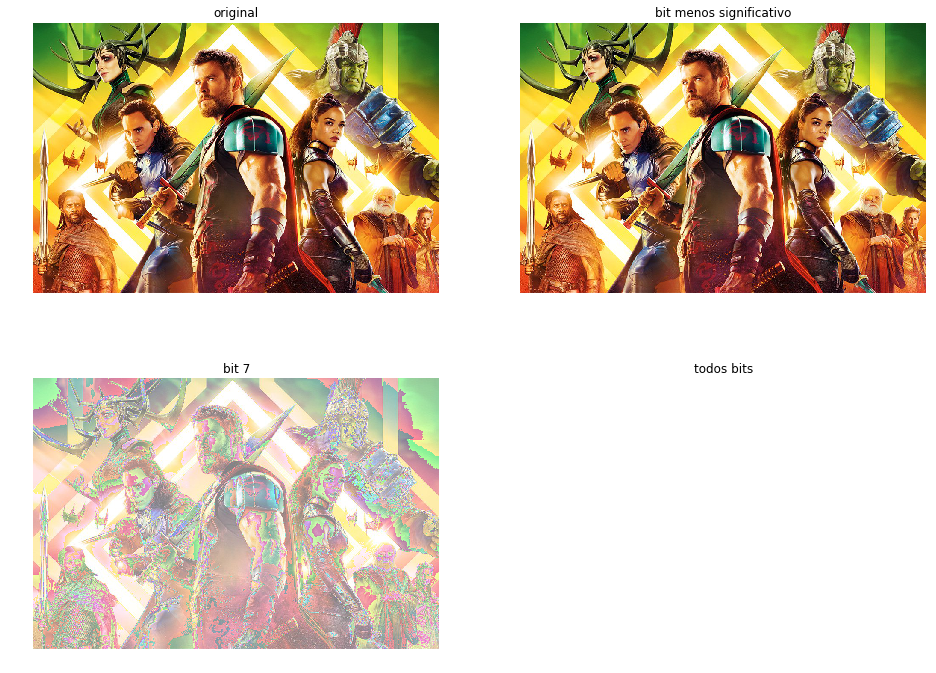

In [28]:
#Tamanho da Imagem
print(imgRGB.shape)

#Formato de um Pixel
print ('Valores de cada pixel antes da modificação do bit menos significativo')
print(imgRGB[1,1,:])

#Representação dos valores RGB EM BINARIO
print('Representação binaria dos valores')
print (["{0:b}".format(imgRGB[1,1,0]),"{0:b}".format(imgRGB[1,1,1]),"{0:b}".format(imgRGB[1,1,2])])

#Modificação dos bits menos significativos
print('Modificando os bits menos significativos para 1')
print (imgRGB[1,1,:] | 1)

#Representação dos valores RGB EM BINARIO após modificar os bits
print('Representação binaria dos valores modificados')
print (["{0:b}".format(imgRGB[1,1,0] | 1),"{0:b}".format(imgRGB[1,1,1] | 1),"{0:b}".format(imgRGB[1,1,2] | 1)])

#Exemplo na imagem
plb.figure(figsize=(16,12))
plb.subplot(2,2,1)
plb.imshow(imgRGB)
plb.axis('off')
plb.title('original')

plb.subplot(2,2,2)
plb.imshow(imgRGB | 1)
plb.axis('off')
plb.title('bit menos significativo')

plb.subplot(2,2,3)
plb.imshow(imgRGB | 128)
plb.axis('off')
plb.title('bit 7')

plb.subplot(2,2,4)
plb.imshow(imgRGB | 255)
plb.axis('off')
plb.title('todos bits')

### 3.4 Vetorizando a Imagem
Como temos 3 matrizes uma para cada canal (RGB) e iremos precisar modificar o primeiro bit de cada valor , para facilitar o processo e não precisarmos ficar alterando o index do canal , transformamos a imagem em um vetor linha utilizando a função flatten, onde podemos alterar cada valor sequencialmente , e somente no fim usamos a função reshape para voltarmos ao formato inicial.

(1804050,)


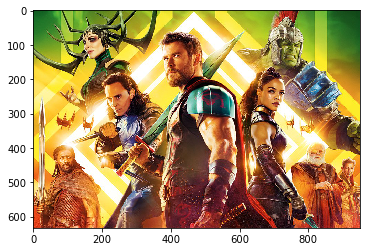

In [65]:
flattened = imgRGB.flatten()
print(flattened.shape)
flat2 = flattened.reshape(imgRGB.shape)
plb.imshow(flat2)

### 3.5 Limite do Tamanho
Temos um limite para o quanto de informação podemos esconder na imagem para que não haja uma perda de qualidade muito grande da imagem original.

Esconderemos 3 tipos de informação nas imagens
Primeiro tipo: uma string 

Estamos usando somente o bit menos significate de cada byte da imagem, então para nossa imagem de resolução 633x950
Temos um total de 633x950x3 = 1,804,050 bytes , e podemos esconder 1 bit por cada byte. Então temos o limite de 1,804,050 bits ou 225,506 bytes de informação.

Segundo tipo: uma imagem
Agora usamos os 2 bits menos significativos de cada byte da imagem, Temos um total de 633x950x3 = 1,804,050 bytes então podemos usar 3,608,100 bits ou 451,012 bytes de informação

## 4. Resultados

## HANDS-On

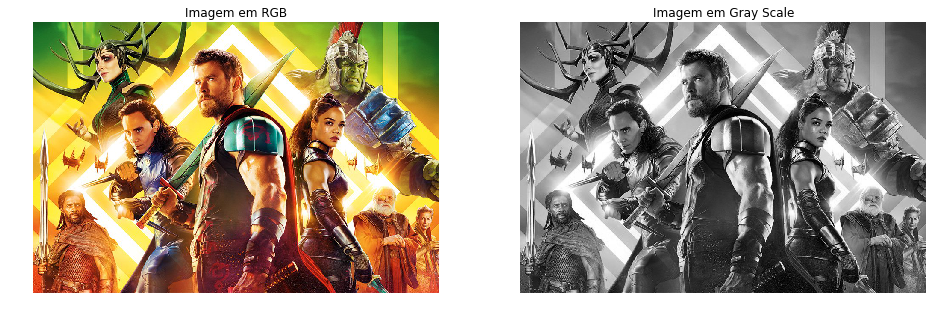

In [69]:
imgColored = plb.imread('thor_ragnarok.jpg',1)
#img = cv2.imread('thor_ragnarok.jpg')

#plb.figure(figsize=(10,8))

#plb.imshow(imgColored) ; axis = plb.axis('off')

imgGray = cv2.cvtColor(imgColored, cv2.COLOR_BGR2GRAY)

#plb.figure()
#plb.imshow(imgColored) ; axis = plb.axis('off')

#plb.figure()
#plb.imshow(imgGray, cmap='gray') # É preciso definir o *colormap* desejado!

plb.figure(figsize=(16,12))

plb.subplot(1,2,1)
plb.imshow(imgColored)
plb.axis('off')
plb.title('Imagem em RGB')

plb.subplot(1,2,2)
plb.imshow(imgGray, cmap='gray')
plb.axis('off')
plb.title('Imagem em Gray Scale')


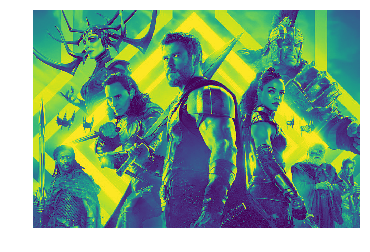

In [70]:
plb.figure()
plb.imshow(imgColored[:,:,1]) ; axis = plb.axis('off')

In [71]:
# Funções úteis

def setbit(byte, bitval, pos):
    ''' Atribui o valor bitval à posição pos do byte. '''
    mask1 = np.uint8(2**pos)
    mask0 = np.invert(mask1, dtype=np.uint8)
    
    if bitval:
        return byte | mask1
    else:
        return byte & mask0
    
def getbit(byte, pos):
    ''' Obtém o bit na posição pos de byte'''
    return (byte >> pos) & 1    

def str2bin(msg):
    ''' Transforma a string msg em uma sequência de bits.'''
    seq = []
    for letter in msg:
        l = ord(letter)  # representação numérica da string letter
        
        # adiciona os 7 bits de cada letra em seq. Ao final, passar para outra letra.
        k = 0
        while k < 7:
            seq.append( l & 1 )
            l = l >> 1
            k += 1
    return seq

def bin2str(seq):
    ''' Transforma uma sequência de bits seq em uma string'''
    
    i, k, ordchar = (0,0,0)
    s = str()
    
    # junta 7 bits e calcula o seu caractere correspondente. Repete até agrupar todos os bits da sequência
    while i < len(seq):
        ordchar = setbit(ordchar, seq[i], k)
        i += 1
        k += 1
        if k == 7:
            s += chr(ordchar)
            ordchar, k = (0,0)
    return s

In [101]:
msg = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."
check = hashlib.md5(msg.encode(encoding='UTF-8',errors='strict'))
seq = str2bin(msg)
rmsg = bin2str(seq)

print(len(msg))
print (msg)
print (seq)
print (rmsg)

445
Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
[0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 

In [73]:
byte = 0b10110111

print (bin(setbit(byte,1,3)))

for p in range(8):
    print (getbit(byte, p))

0b10111111
1
1
1
0
1
1
0
1


In [74]:
def flatten_img(img):
    ''' Transforma a img em um vetor '''
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    
    return np.concatenate((r.flatten(), g.flatten(), b.flatten()))

def stego_str(cover, msg, verbose=False):
    ''' Dissimula a mensagem secreta msg na imagem cover. '''

    # transforma sequência de texto em bits
    seq = str2bin(msg)
    
    # vetoriza a imagem cover
    stego = flatten_img(cover)
    
    # codifica os pixels da imagem cover vetorizada
    for k in range(len(seq)):
        antes = stego[k]
        stego[k] = setbit(stego[k], seq[k], 0)
        if verbose:
            print ('antes: {:b} ({}), seq[{}]: {:b}, depois: {:b} ({})'.format(antes, antes, k, seq[k], stego[k], stego[k]))
    
    # recupera os canais rgb
    refshape = cover[:,:,0].shape     # dimensões de um canal
    sz = cover[:,:,0].size            # quantidade de pixels em um canal
    
    sr = stego[0:sz].reshape(refshape)
    sg = stego[sz:2*sz].reshape(refshape)
    sb = stego[2*sz:3*sz].reshape(refshape)
    
    # cria nova imagem a partir dos canais rgb recuperados
    simg = np.zeros(cover.shape, dtype=np.uint8)
    simg[:,:,0] = sr
    simg[:,:,1] = sg
    simg[:,:,2] = sb
    
    return simg

def unstego_str(simg, nread):
    ''' lê nread bits dos LSBs do estego-objeto simg '''
    # vetoriza a imagem cover
    sv = flatten_img(simg)
    
    # checa validade do argumento
    if nread > simg.size:
        raise Exception('Número de bits a serem lidos é maior que a quantidade de bits da imagem')
           
    # forma sequencia de lsbs
    seq = []
    for k in range(nread):
        seq.append(getbit(sv[k],0))
        
    return bin2str(seq)


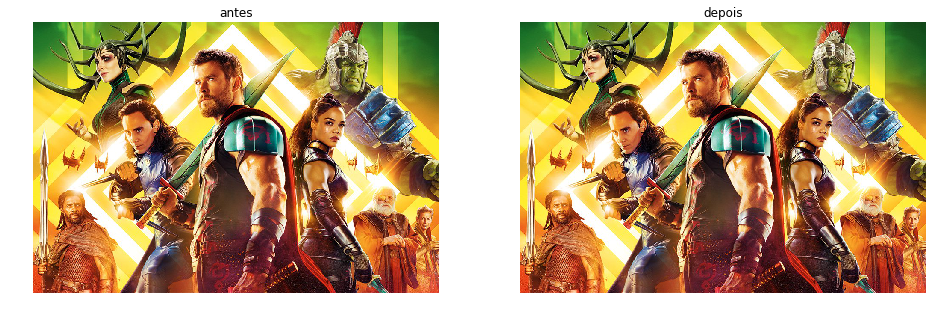

In [102]:
simg = stego_str(imgRGB, msg)

plb.figure(figsize=(16,12))
plb.subplot(1,2,1)
plb.imshow(imgRGB)
plb.axis('off')
plb.title('antes')

plb.subplot(1,2,2)
plb.imshow(simg)
plb.axis('off')
plb.title('depois')

In [103]:
msg2 = unstego_str(simg, 3115) 
check2 = hashlib.md5(msg2.encode(encoding='UTF-8',errors='strict'))
print (msg2)
print(check2.digest() == check.digest())


Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
True


In [ ]:
## Escrever E ler wav file
w = wave.open("doublebass.wav", "rb")
binary_data = w.readframes(w.getnframes())
a = wave.open('teste.wav','w')
a.setnchannels(2)
w.getsampwidth()
a.setsampwidth(2)
w.getframerate()
a.setframerate(44100)
a.writeframes(binary_data)